# <center> Projekt numer 6</center>
# <center> Faktoryzacja QR z obrotami </center>
### <center> Maciej Pięta, Hubert Kabziński </center>

# 1. Opis zadania

Celem zadania było zaimplementowanie algorytmu faktoryzacji QR przedstawionego jako kompozycja obrotów. W raporcie należało przetestować algorytm na przykładzie macierzy o rozmiarze odpowiadającym naszym dniom i miesiącom urodzin, opisać pseudokod odpowiedzialny za działanie algorytmu, a także zweryfikować poprawność algorytmu biblioteką numeryczną wbudowaną w język programowania. W naszym przypadku jest to język Python.

# 2. Wprowadzenie teoretyczne

W przypadku faktoryzacji QR zadana macierz A przedstawiana jest jako macierz ortogonalna Q oraz macierzy trójkątnej górnej R. Jest to użyteczne rozwiązanie używane przy rozwiązywaniu układów równań liniowych, regresji liniowej, dekompozycji SVD i wielu innych. 

Jednym ze sposobów na obliczenie faktoryzacji QR jest wykorzystanie obrotów. Obroty te polegają na kolejnych rotacja 2D, które eliminują elementy poniżej diagonali. Metoda obrotów uchodzi za lokalną oraz efektywną w przypadku pracy z macierzami rzadkimi.

W tym raporcie przedstawimy pseudokod, implementację oraz działanie faktoryzacji QR z obrotami dla dwóch macierzy: jednej rozmiaru 14 x 14 a drugiej 40 x 40. Na koniec porównamy dokładność z faktoryzacją dostępną w bibliotece numerycznej.

## 2.1. Pseudokod i opis algorytmu:

```bash
Wejście: Macierz A o rozmiarze n x m
Wyjście: Macierze Q (ortogonalna), R (trójkątna górna)

Krok 1. Utwórz macierz jednostkową Q o wymiarze n x n

Krok 2. Skopiuj A do R

Krok 3. Dla każdej kolumny j od 0 do m-1:
    a. Dla każdego wiersza i od n-1 do j+1 (w dół):
        i. Oblicz obrót, który zeruje element R[i, j]
           - dane wejściowe: a = R[i-1, j], b = R[i, j]
           - oblicz c = a / sqrt(a^2 + b^2), s = -b / sqrt(a^2 + b^2)
        ii. Skonstruuj macierz obrotu G (rozmiar n x n)
            - tylko wiersze i-1 i i są modyfikowane
        iii. Zaktualizuj R: R = G @ R
        iv. Zaktualizuj Q: Q = Q @ G.T
        
Krok 4. Zwróć Q i R
```

Szczegółowy opis:

1. Inicjalizacja:
- Macierz A to losowa macierz wejściowa,
- Macierz R utworzona jest jako kopia macierzy A,
- Macierz Q to jednostkowa - początkowo obrazuje to że nie doszło do żadnej rotacji.

2. Iteracja:
- przechodzimy po wierszach poniżej diagonali,
- szukamy odpowiedniego kąta rotacji dla zadanego elementu który chcemy wyzerować.

3. Obliczanie obrotu:
- za pomocą funkcji obrotu obliczamy współczynniki `c` i `s`, takie że:

$$
G(i, j, \theta) \cdot \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} r \\ 0 \end{bmatrix}
$$

- dzięki takiemu zabiegowi usunięta zostaje wartość `b` w kolumnie `j` poniżej diagonali.

4. Zastosowanie obrotu:
- macierz obrotu `G` oddziałowuje tylko na wiersze `i - 1` oraz `i`,
- poprzez operację mnożenia `R` <- `G * R` eliminujemy element,
- mnożymy `Q` <- `Q * G^t` przez co aktualizujemy zbiór rotacji.

5. Finalizacja:
- jako wynik otrzymujemy dwie macierze, R która jest macierzą górną trójkątną, a także Q która zawiera wszystkie obroty które transformują macierz A do macierzy R.

## 2.2. Kod odpowiedzialny za obliczenia:

In [1]:
import numpy as np

def rotation(a, b):
    r = np.hypot(a, b)
    if r == 0:
        return 1.0, 0.0
    return a/r, -b/r

def qr(A, verbose=True, num_prints=5):
    n, m = A.shape
    Q = np.eye(n)
    R = A.copy()
    total_steps = sum(n - j - 1 for j in range(m))
    print_indices = np.linspace(0, total_steps - 1, num_prints, dtype=int)
    
    current_step = 0
    print_counter = 0
    
    if verbose and print_counter < num_prints:
        print(f"\nStan początkowy: krok {current_step}):")
        print("Fragment R (pierwsze 10x10):")
        print(np.round(R))
        print("Fragment Q (pierwsze 10x10):")
        print(np.round(Q))
        print_counter += 1

    for j in range(m):
        for i in range(n-1, j, -1):
            c, s = rotation(R[i-1, j], R[i, j])
            G = np.eye(n)
            G[i-1, i-1] = c
            G[i, i] = c
            G[i-1, i] = -s
            G[i, i-1] = s
            R = G @ R
            Q = Q @ G.T

            if verbose and current_step in print_indices[1:-1]:
                print(f"\nKrok {current_step+1}: Zerowanie R[{i},{j}]")
                print(f"c = {c:.4f}, s = {s:.4f}")
                print("Fragment R (pierwsze 10x10):")
                print(np.round(R))
                print("Fragment Q (pierwsze 10x10):")
                print(np.round(Q))
                print_counter += 1

            current_step += 1

    if verbose and print_counter < num_prints:
        print(f"\nStan końcowy (krok {current_step}):")
        print("Fragment R (pierwsze 10x10):")
        print(np.round(R))
        print("Fragment Q (pierwsze 10x10):")
        print(np.round(Q))

    return Q, R


Generacja macierzy 14 x 14 i uruchmienie algorytmu:

In [2]:
np.random.seed(123)
A_14 = np.random.randn(14, 14)

Q_14, R_14 = qr(A_14, verbose=True, num_prints=5)


Stan początkowy: krok 0):
Fragment R (pierwsze 10x10):
[[-1.  1.  0. -2. -1.  2. -2. -0.  1. -1. -1. -0.  1. -1.]
 [-0. -0.  2.  2.  1.  0.  1.  1. -1.  1. -1. -1.  1. -1.]
 [-0. -1. -0. -3. -2. -1.  1. -0.  0.  1. -1.  0. -1. -2.]
 [-0.  1.  0. -0.  2.  0.  1.  2. -1. -1.  2. -1.  0.  1.]
 [ 1.  2.  1.  1. -1.  1.  0. -1.  1.  1.  0. -0. -1.  0.]
 [ 0. -1.  1. -1. -2.  1. -0. -0. -1. -2.  1. -1.  2.  1.]
 [-0. -1. -1. -1.  2.  0.  1. -1.  0.  1. -0.  1. -1. -1.]
 [ 0. -0.  1. -2.  1.  3. -0.  0.  0. -2.  0. -2. -0.  1.]
 [-1.  1.  1.  0. -1. -0.  2. -2. -0. -1.  0.  1.  2. -0.]
 [ 1.  0.  0. -1. -1. -1. -1.  0.  1.  0. -1.  2.  2. -0.]
 [-1.  0.  1.  0.  1. -0.  0.  2. -0.  0.  0.  0. -1. -2.]
 [-1.  0.  1. -1.  1. -0.  0. -0.  0.  1.  1. -1.  2. -1.]
 [ 0. -0. -1. -0. -1.  0.  0.  1.  0. -1. -0.  0.  0.  1.]
 [ 1. -0. -1. -3. -1. -1. -0.  0.  0. -0.  0. -0.  0. -3.]]
Fragment Q (pierwsze 10x10):
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Jak widać, wraz z kolejnymi krokami macierz R dąży do stania się macierzą trójkątną górną. Z kolei macierz Q jest stopniowo uzupełniana coraz to kolejnymi współczynnikami odpowiedzialnymi za obroty. Warto również zwrócić uwagę na liczbę kroków, która jest potrzebna do uzyskania wyniku i obliczenia macierzy. 91 kroków jest jednak całkiem dużą liczbą.

Weryfikacja jakości dla macierzy 14 x 14:

In [8]:
A_approx = Q_14 @ R_14
reconstruction_error = np.linalg.norm(A_14 - A_approx)
Q_orthogonality = np.linalg.norm(Q_14.T @ Q_14 - np.eye(14))
numpy_diff = np.linalg.norm(Q_14 - np.linalg.qr(A_14)[0])
Q_np, R_np = np.linalg.qr(A_14)
A_approx_np = Q_np @ R_np
reconstruction_error_np = np.linalg.norm(A_14 - A_approx_np)
Q_orthogonality_np = np.linalg.norm(Q_np.T @ Q_np - np.eye(14))

print("====== Nasza implementacja ======")
print("Błąd rekonstrukcji: ", reconstruction_error)
print("Ortogonalność Q:    ", Q_orthogonality)

print("\n====== NumPy ======")
print("Błąd rekonstrukcji: ", reconstruction_error_np)
print("Ortogonalność Q:    ", Q_orthogonality_np)

print("\n====== Różnica Q z NumPy ======")
print("Różnica Q:           ", numpy_diff)

====== Nasza implementacja ======
Błąd rekonstrukcji:  7.441536602373808e-15
Ortogonalność Q:     2.126217446681421e-15

====== NumPy ======
Błąd rekonstrukcji:  7.0911591746570545e-15
Ortogonalność Q:     1.7643494925219223e-15

====== Różnica Q z NumPy ======
Różnica Q:            3.464101615137755


Teraz zrobimy to samo tylko, że dla macierzy 40 x 40:

In [5]:
np.random.seed(123)
A_40 = np.random.randn(40, 40)

Q_40, R_40 = qr(A_40, verbose=True, num_prints=5)


Stan początkowy: krok 0):
Fragment R (pierwsze 10x10):
[[-1.  1.  0. ...  1. -1.  0.]
 [-1. -2. -0. ... -0. -1. -2.]
 [ 1. -1.  2. ... -0.  2. -2.]
 ...
 [-0.  1.  0. ...  1.  0.  0.]
 [-0. -0.  1. ... -1.  0.  1.]
 [-0. -2.  0. ...  1. -1. -1.]]
Fragment Q (pierwsze 10x10):
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Krok 195: Zerowanie R[30,5]
c = 0.4015, s = -0.9159
Fragment R (pierwsze 10x10):
[[ 6.  0.  2. ...  0. -0. -1.]
 [ 0.  5.  2. ... -1.  0.  2.]
 [ 0. -0.  5. ...  0. -0. -1.]
 ...
 [-0.  0. -0. ... -1.  1.  1.]
 [-0. -0.  0. ... -1. -0. -0.]
 [-0.  0. -0. ...  0.  0.  1.]]
Fragment Q (pierwsze 10x10):
[[-0.  0.  0. ...  0.  0.  0.]
 [-0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]
 ...
 [-0.  0. -0. ... -0.  0.  0.]
 [-0. -0.  0. ...  0.  0.  0.]
 [-0. -0.  0. ... -0. -0. -0.]]

Krok 390: Zerowanie R[24,11]
c = -0.0484, s = -0.9988
Fragment R (pierw

Podobnie jak dla poprzedniego przypadku, macierze są stopniowo uzupełniane a macierz R ostatecznie staje się macierzą górną trójkątną. Warto zauważyć, że dla macierzy 40 x 40 potrzebne jest aż 780 kroków, aby obliczyć macierze Q i R. Jest to zdecydowany wzrost względem macierzy o rozmiarze 14 x 14.

Weryfikacja jakości dla macierzy 40 x 40:

In [7]:
A_approx = Q_40 @ R_40
reconstruction_error = np.linalg.norm(A_40 - A_approx)
Q_orthogonality = np.linalg.norm(Q_40.T @ Q_40 - np.eye(40))
numpy_diff = np.linalg.norm(Q_40 - np.linalg.qr(A_40)[0])
Q_np, R_np = np.linalg.qr(A_40)
A_approx_np = Q_np @ R_np
reconstruction_error_np = np.linalg.norm(A_40 - A_approx_np)
Q_orthogonality_np = np.linalg.norm(Q_np.T @ Q_np - np.eye(40))

print("====== Nasza implementacja ======")
print("Błąd rekonstrukcji: ", reconstruction_error)
print("Ortogonalność Q:    ", Q_orthogonality)

print("\n====== NumPy ======")
print("Błąd rekonstrukcji: ", reconstruction_error_np)
print("Ortogonalność Q:    ", Q_orthogonality_np)

print("\n====== Różnica Q z NumPy ======")
print("Różnica Q:           ", numpy_diff)

====== Nasza implementacja ======
Błąd rekonstrukcji:  3.289783159746714e-14
Ortogonalność Q:     5.610768294007703e-15

====== NumPy ======
Błąd rekonstrukcji:  1.8995585918520356e-14
Ortogonalność Q:     3.894301677641289e-15

====== Różnica Q z NumPy ======
Różnica Q:            9.16515138991168


## 2.3. Podsumowanie wyników:

### 1. Błąd rekonstrukcji:

Dla obu testowanych macierzy, błąd rekonstrukcji macierzy `A` poprzez iloczyn `QR` jest niezwykle mały (rzędu 10^-14 czy 10^-15). Oznacza to, że zaimplementowany algorytm QR z obrotami poprawnie odwzorowuje macierz wejściową a faktoryzacja jest stabilna.

### 2. Ortogonalność macierzy Q:

Norma różnicy `Q^T*Q - I` również jest bardzo mała (rząd pokrywa się z błędem rekonstrukcji) co dowodzi temu, że macierz jest prawie ortogonalna. Wskazuje to na poprawne wykonanie kolejnych rotacji oraz zachowanie własności macierzy ortogonalnej podczas faktoryzacji. 

### 3. Różnica między macierzą Q a wynikiem NumPy:

W obu przypadkach można zauważyć różnicę w normie między macierzą `Q` z naszej implementacji a macierzą `Q` którą zwróciła biblioteka `NumPy`. Wskazuje to na to, że zarówno nasza funkcja jak i funkcja biblioteczna zwracają kompletnie inne macierze, różne na poziomie poszczególnych elementów. Warto zauważyć jednak, że:
- faktoryzacja QR nie jest jednoznaczna przez co ma wiele poprawnych wyników. Macierze `Q` mogą różnić się znakami i kolumn czy kolejnością,
- różnice mogą wynikać z innych metod stosowanych przez bibliotekę przez co obroty są wykonywane w różny od naszego sposób,
- iloczyn `QR` odtwarza macierz bardzo dokładnie przez co wiemy, że nasza implementacja działa poprawnie.

# 3. Eksperymenty:

W celu sprawdzenia i porównania naszej implementacji z tą oferowaną przez bibliotekę przeprowadziliśmy serię badań obserwując jak zmieniają się błędy, czasy wykonania i inne parametry wraz z różnymi macierzami.

In [44]:
import numpy as np

def rotation(a, b):
    r = np.hypot(a, b)
    if r == 0:
        return 1.0, 0.0
    return a/r, -b/r

def qr(A):
    n, m = A.shape
    Q = np.eye(n)
    R = A.copy()

    for j in range(m):
        for i in range(n-1, j, -1):
            c, s = rotation(R[i-1, j], R[i, j])
            G = np.eye(n)
            G[i-1, i-1] = c
            G[i, i] = c
            G[i-1, i] = -s
            G[i, i-1] = s
            R = G @ R
            Q = Q @ G.T

    return Q, R


In [43]:
import numpy as np
import time
import matplotlib.pyplot as plt

Rozmiary macierzy zostały ograniczone do 512 x 512 ponieważ przy większych macierzach program zajmował mnóstwo czasu aby skończyć obliczenia.

In [61]:
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]

results = []

for n in sizes:
    print(f"Processing size: {n}x{n}")
    np.random.seed(0)
    A = np.random.randn(n, n)
    
    start = time.time()
    Q_custom, R_custom = qr(A)
    end = time.time()

    start_np = time.time()
    np.linalg.qr(A)
    end_np = time.time()

    A_approx = Q_custom @ R_custom
    recon_error = np.linalg.norm(A - A_approx)
    Q_ortho = np.linalg.norm(Q_custom.T @ Q_custom - np.eye(n))
    numpy_Q = np.linalg.qr(A)[0]
    diff_numpy = np.linalg.norm(Q_custom - numpy_Q)

    results.append({
        "n": n,
        "reconstruction_error": recon_error,
        "Q_orthogonality": Q_ortho,
        "diff_with_numpy": diff_numpy,
        "execution_time": end - start,
        "execution_time_numpy": end_np - start_np
    })

n_vals = np.array([r["n"] for r in results])
recon_errors = np.array([r["reconstruction_error"] for r in results])
orthogonality_errors = np.array([r["Q_orthogonality"] for r in results])
diffs_with_numpy = np.array([r["diff_with_numpy"] for r in results])
times = np.array([r["execution_time"] for r in results])
times_numpy = np.array([r["execution_time_numpy"] for r in results])

Processing size: 2x2
Processing size: 4x4
Processing size: 8x8
Processing size: 16x16
Processing size: 32x32
Processing size: 64x64
Processing size: 128x128
Processing size: 256x256
Processing size: 512x512


1. Błąd rekonstrukcji vs. rozmiar

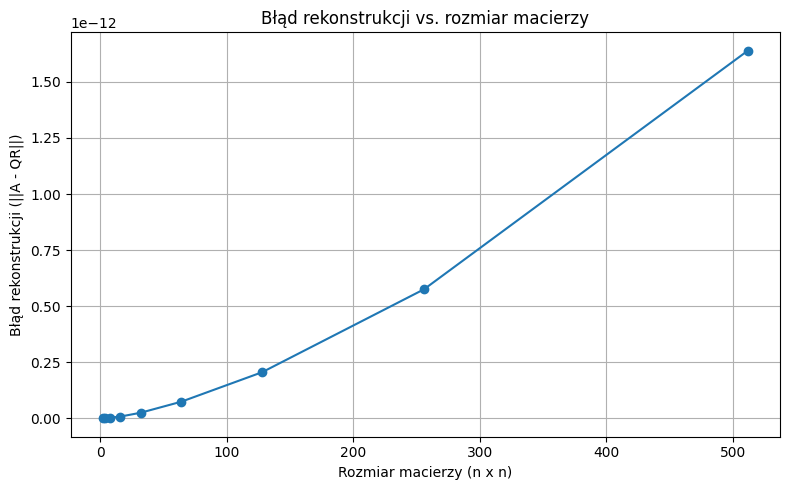

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(n_vals, recon_errors, marker='o')
plt.title("Błąd rekonstrukcji vs. rozmiar macierzy")
plt.xlabel("Rozmiar macierzy (n x n)")
plt.ylabel("Błąd rekonstrukcji (||A - QR||)")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Ortogonalność Q vs. rozmiar

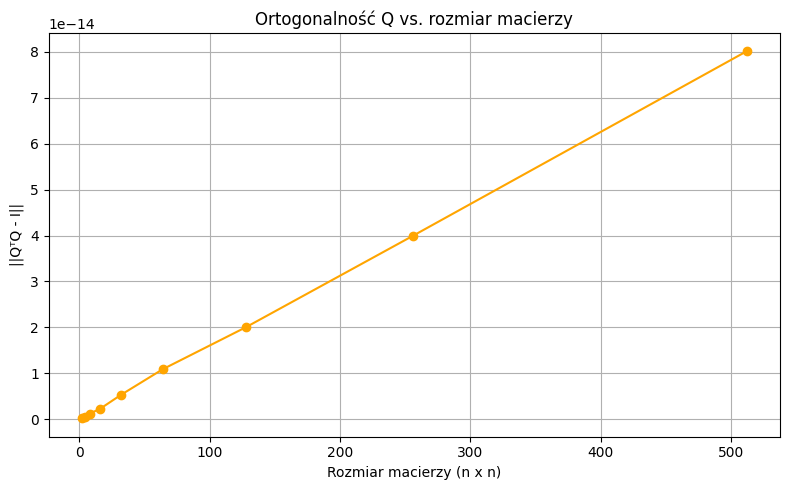

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(n_vals, orthogonality_errors, marker='o', color='orange')
plt.title("Ortogonalność Q vs. rozmiar macierzy")
plt.xlabel("Rozmiar macierzy (n x n)")
plt.ylabel("||QᵀQ - I||")
plt.grid(True)
plt.tight_layout()
plt.show()

3. Różnica z NumPy Q vs. rozmiar


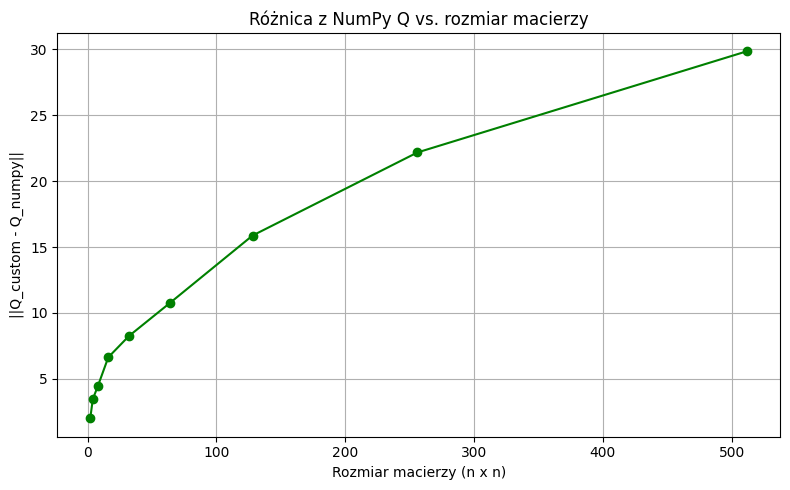

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(n_vals, diffs_with_numpy, marker='o', color='green')
plt.title("Różnica z NumPy Q vs. rozmiar macierzy")
plt.xlabel("Rozmiar macierzy (n x n)")
plt.ylabel("||Q_custom - Q_numpy||")
plt.grid(True)
plt.tight_layout()
plt.show()

4. Czas wykonania vs. rozmiar

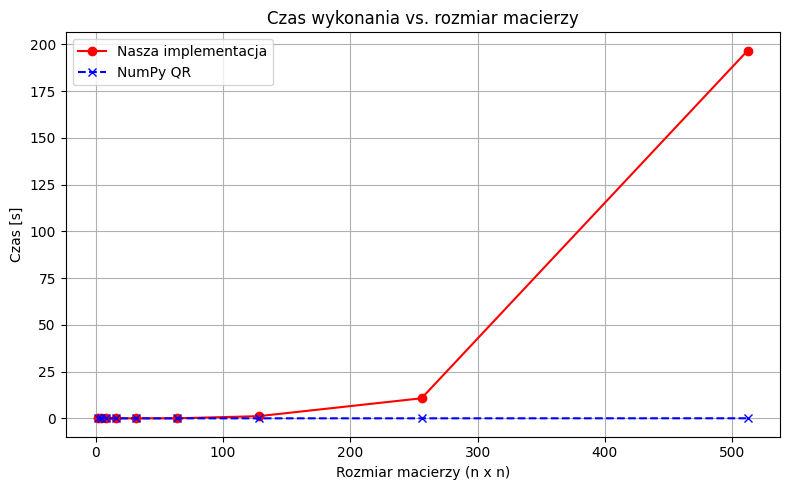

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(n_vals, times, marker='o', color='red', label='Nasza implementacja')
plt.plot(n_vals, times_numpy, marker='x', color='blue', linestyle='--', label='NumPy QR')
plt.title("Czas wykonania vs. rozmiar macierzy")
plt.xlabel("Rozmiar macierzy (n x n)")
plt.ylabel("Czas [s]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.2. Wnioski:
- wraz z rozmiarem macierzy powiększają się błędy generowane przez nasz algorytm, jest to spodziewane ponieważ im więcej razy będziemy przeprowadzać dane obliczenia tym większa szansa, że błąd będzie propagowany,
- czas wykonania naszego algorytmu jest dużo gorszy niż czas metody z biblioteki. Tutaj również mogliśmy się tego spodziewać ponieważ biblioteka posiada optymalny algorytm, który ma za zadanie jak najszybsze obliczenia,
- pomimo tego, że błedy są coraz większe, ciągle możemy powiedzieć że błąd rekonstrukcji jest bardzo mały. Podobnie ma się to do ortogonalności,
- różnica między normami macierzy `Q` uzyskanej na skutek naszego algorytmu a implementacji bibliotecznej jest coraz większa i będzie również większa dla coraz większych macierzy. Jest to spodziewane, bo przy coraz większych macierzach mamy więcej obliczeń do przeprowadzenia przez co błędy będą się nakładać.